### Library for loading an image from url

In [13]:
!pip install --ignore-installed Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Pillow-9.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


### Install pytesseract for using OCR model

In [14]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### mount colab with google drive

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import cv2
import imutils
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
from io import StringIO
import seaborn as sns
import os
import glob

%matplotlib inline




In [17]:
def detectAndRecognizePlate(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  gray = cv2.bilateralFilter(gray, 13, 15, 15) 

  edged = cv2.Canny(gray, 30, 200) 
  contours = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  contours = imutils.grab_contours(contours)
  contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
  screenCnt = None
  #print(len(contours[0]))

  for c in contours:
      
      peri = cv2.arcLength(c, True)
      approx = cv2.approxPolyDP(c, 0.018 * peri, True)
      # plt.imshow(contours)
      # plt.imshow
      if len(approx) == 4:
          screenCnt = approx
          # plt.imshow(contours)
          # plt.imshow
          break

  if screenCnt is None:
      detected = 0
      print ("No contour detected")
  else:
      detected = 1

  if detected == 1:
      im = cv2.drawContours(img, [screenCnt], -1, (0, 0, 255), 3)
      plt.imshow(im)
      plt.show()

  mask = np.zeros(gray.shape,np.uint8)
  new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
  new_image = cv2.bitwise_and(img,img,mask=mask)

  (x, y) = np.where(mask == 255)
  (topx, topy) = (np.min(x), np.min(y))
  (bottomx, bottomy) = (np.max(x), np.max(y))
  Cropped = gray[topx:bottomx+1, topy:bottomy+1]

  text = pytesseract.image_to_string(Cropped, config='--psm 11')
  print("Detected license plate Number is:",text)

  img = cv2.resize(img,(500,300))
  Cropped = cv2.resize(Cropped,(400,200))
  plt.imshow(img)
  plt.show
  plt.imshow(Cropped, cmap = 'nipy_spectral')
  plt.show()

## import imread from imageio to read images from url

In [10]:
from imageio import imread

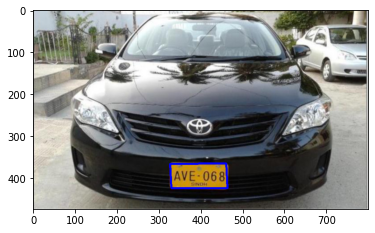

Detected license plate Number is: ‘AVE: 068



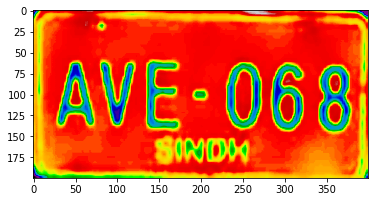

In [24]:
url = "https://benthamopen.com/contents/figures/TOAIJ/TOAIJ-6-12_F4.jpg"
img = imread(url)
detectAndRecognizePlate(img)

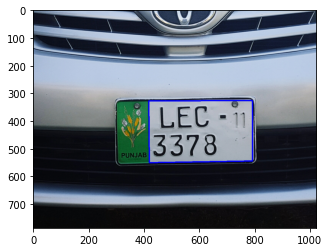

Detected license plate Number is: LEC - 7

3378



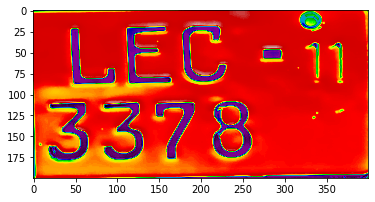

In [25]:
url = "https://i.imgur.com/K3qa7ME.jpeg"
img = imread(url)
detectAndRecognizePlate(img)

In [7]:
# url = "https://benthamopen.com/contents/figures/TOAIJ/TOAIJ-6-12_F4.jpg"
# img = imread(url)
# detectAndRecognizePlate(img)

In [8]:
# url = "https://i.imgur.com/K3qa7ME.jpeg"
# img = imread(url)
# detectAndRecognizePlate(img)

## Testing on images on dataset

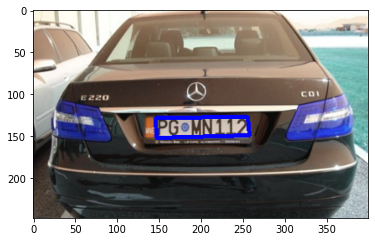

Detected license plate Number is: PGeMN112



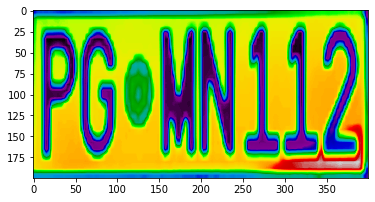

In [19]:
sample_data_path = "/content/drive/MyDrive/Colab Notebooks/AI_Project/Dataset/sample"
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/AI_Project/Dataset/images/Cars1.png',cv2.IMREAD_COLOR)
original_img = img


# # #url = "https://static.carmandee.com/vehicles/toyota-corolla-altis-1.6-2018-x4SpOHD04Cu1Q4nVihD0W.jpeg"
# #url = "https://carwow-uk-wp-3.imgix.net/numberplate-retention-montage-lead-1-scaled.jpg"
#url = "https://upload.wikimedia.org/wikipedia/commons/3/3f/Pakistan_-_License_Plate_-_Punjab.png"
#url = "https://upload.wikimedia.org/wikipedia/commons/b/b9/Pakistan_-_License_Plate_-_Balochistan.png"


# # # Read Image from web URL


detectAndRecognizePlate(img)

In [20]:
sample_data_path = "/content/drive/MyDrive/Colab Notebooks/AI_Project/Dataset/sample"

#img_dir = "/content/drive/MyDrive/Colab Notebooks/AI_Project/Dataset/images" # Enter Directory of all images 
data_path = os.path.join(sample_data_path,'*g')
samole_images = glob.glob(data_path)
samole_images.sort()
sample_imgs=[]
for f1 in samole_images:
    img = cv2.imread(f1)
    sample_imgs.append(np.array(img))

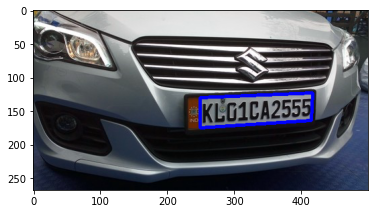

Detected license plate Number is: KEG10A2555



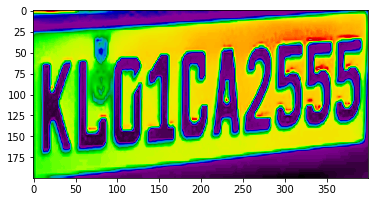

In [21]:
detectAndRecognizePlate(sample_imgs[0].copy())

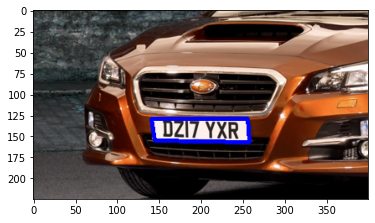

Detected license plate Number is: DZI7 YXR_



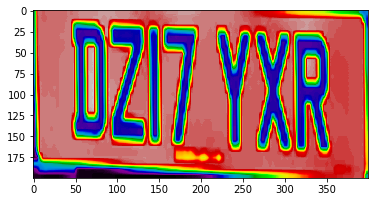

In [22]:
detectAndRecognizePlate(sample_imgs[1].copy())

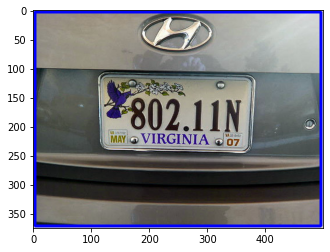

Detected license plate Number is: Sd

Sol

© }

¥302.11N

"802.11 .@ VIRGINIA git N

——=—



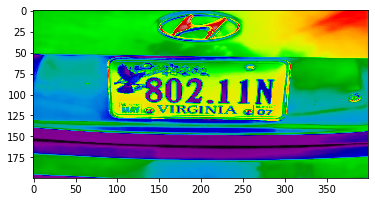

In [23]:
detectAndRecognizePlate(sample_imgs[2].copy())